In [32]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')
  n = int(data[0])
  adjacency_matrix = []
  for i in range(n):
    row = list(map(int, data[1+i].split()))
    adjacency_matrix.append(row)

  px = int(data[n+1])
  py = int(data[n+2])

  return n, adjacency_matrix, px, py

## GRPA 1

In [33]:
def convert_matrix_to_list(adjacency_matrix):
  n = len(adjacency_matrix)
  adjacency_list = {i: [] for i in range(n)}

  for i in range(n):
    for j in range(n):
      if adjacency_matrix[i][j] == 1:
        adjacency_list[i].append(j)

  return adjacency_list


adjacency_matrix = [
    [0, 0, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 0, 0],
]
convert_matrix_to_list(adjacency_matrix)

{0: [2], 1: [], 2: [], 3: [0, 1]}

In [34]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    return self.data.pop(0)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue.data)

10
20
30
[40]


In [35]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  level = {vertex: 0 for vertex in adjacency_list}

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
        level[adj_vertex] = level[curr_vertex]+1

  return level

In [36]:
def find_connection_level(n, adjacency_matrix, px, py):
  adjacency_list = convert_matrix_to_list(adjacency_matrix)
  level = bfs(adjacency_list, px)
  return level[py]


find_connection_level(*parse_my_input("""
15
0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
0 1 1 0 1 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
12
13
"""))

3

## GRPA 2

In [37]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  V = list(map(int, data[0].split()))
  E = [list(map(int, edge.split())) for edge in data[2:]]

  return V, E

In [38]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
  return visited


def find_master_tank(tanks, pipes):
  adjacency_list = {}
  for tank in tanks:
    adjacency_list[tank] = []
  for i_tank, j_tank in pipes:
    adjacency_list[i_tank].append(j_tank)

  for tank in tanks:
    visited = bfs(adjacency_list, tank)
    if all(visited.values()):
      return tank
  return 0


find_master_tank(*parse_my_input("""
1 2 3 4 5 6 7
9
1 3
2 3
3 6
4 6
4 7
6 2
7 5
5 1
5 6
"""))

4

## stack/dfs/topological sort

In [39]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)

In [40]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for adj_vertex in adjacency_list[curr_vertex]:
    # if neighbor is not visited, call dfs on neighbor
    if not visited[adj_vertex]:
      dfs(adjacency_list, adj_vertex, visited, stack)

  # append curr_vertex to stack
  stack.append(curr_vertex)

In [41]:
def topological_sorting(adjacency_list):
  # initialize visited dictionary and stack
  visited = {vertex: False for vertex in adjacency_list}
  stack = []

  # for each vertex in adjacency_list:
  for vertex in adjacency_list:
    # if vertex is not visited, call dfs
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, stack)

  # return stack in reverse order
  return stack[::-1]


adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}

topological_sorting(adjacency_list)

[1, 3, 5, 2, 7, 4, 6]

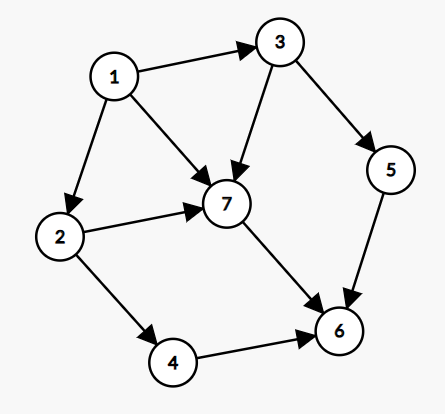

## Longest path

In [42]:
def longest_path(adjacency_list, start_vertex):
  # get topological order of vertices
  topological_order = {vertex: False for vertex in adjacency_list}

  # initialize distances dictionary with -1 for all vertices, set distances[start_vertex] to 0
  distances = {vertex: -1 for vertex in adjacency_list}
  distances[start_vertex] = 0

  for vertex in topological_order:
    # if vertex is reachable (distances[vertex] != -1):
    if distances[vertex] != -1:
      for neighbor in adjacency_list[vertex]:
        distances[neighbor] = max([distances[neighbor], distances[vertex]+1])

  return distances


adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
longest_path(adjacency_list, 1)

{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 7: 2, 6: 3}

## GRPA 3

In [43]:
adjacency_list = {'Madurai': ['Cochin', 'Kanyakumari'],
                  'Vaishali': [],
                  'Varanasi': ['Khajuraho', 'Bodhgaya'],
                  'Thiruvanandhapuram': ['Kanyakumari'],
                  'Udaipur': ['Gir'],
                  'Rishikesh': ['Delhi'],
                  'Shimla': ['Rishikesh'],
                  'Bangalore': ['Chennai', 'Madurai'],
                  'Agra': ['Ranthambore'],
                  'Bodhgaya': ['Kolkatta'],
                  'Cochin': ['Thiruvanandhapuram'],
                  'Pushkar': ['Udaipur', 'Ranthambore'],
                  'Ranthambore': ['Khajuraho'],
                  'Gir': [],
                  'Kolkatta': ['Bangalore', 'Chennai'],
                  'Chennai': ['Madurai'],
                  'Sravasti': ['Kushinagar'],
                  'Leh': ['Shimla'],
                  'Sarnath': ['Varanasi'],
                  'Delhi': ['Jaipur', 'Agra', 'Sravasti'],
                  'Kanyakumari': [],
                  'Kushinagar': ['Sarnath', 'Vaishali'],
                  'Khajuraho': [],
                  'Jaipur': ['Pushkar']}

excepted_output = ['Leh', 'Shimla', 'Rishikesh', 'Delhi', 'Sravasti', 'Kushinagar', 'Sarnath', 'Varanasi',
                   'Bodhgaya', 'Kolkatta', 'Bangalore', 'Chennai', 'Madurai', 'Cochin', 'Thiruvanandhapuram', 'Kanyakumari']

In [44]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)

In [45]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs(adjacency_list, adj_vertex, visited, stack)

  stack.push(curr_vertex)

In [46]:
def topological_sorting(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  stack = Stack()

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, stack)

  stack.data.reverse()
  return stack.data

In [47]:
def dag_longest_path_distances(adjacency_list):
  topological_order = topological_sorting(adjacency_list)

  distances = {vertex: False for vertex in adjacency_list}
  predecessors = {vertex: -1 for vertex in adjacency_list}

  start_vertex = topological_order[0]
  distances[start_vertex] = 0

  for parent_vertex in topological_order:
    if distances[parent_vertex] != -1:
      for child_vertex in adjacency_list[parent_vertex]:
        new_distances = distances[parent_vertex]+1
        if distances[child_vertex] < new_distances:
          distances[child_vertex] = new_distances
          predecessors = parent_vertex
  return distances, predecessors

In [48]:
# def long_journey(adjacency_list):
#   distances, predecessors = dag_longest_path_distances(adjacency_list)

#   best_path = []
#   city = sorted(distances, key=lambda city: distances[city])[-1]
#   while city is not None:
#     best_path.append(city)
#     city = predecessors[city]

#   best_path.reverse()
#   return best_path


# long_journey(adjacency_list) == excepted_output

## GRPA 3 revision

In [49]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)

In [50]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs(adjacency_list, adj_vertex, visited, stack)

  stack.push(curr_vertex)

In [51]:
def topological_sort(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  stack = Stack()

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, stack)

  stack.data.reverse()
  return stack.data

In [66]:
def longest_path(adjacency_list):
  topological_order = topological_sort(adjacency_list)

  distances = {vertex: -1 for vertex in adjacency_list}
  predecessor = {vertex: None for vertex in adjacency_list}

  start_vertex = topological_order[0]
  distances[start_vertex] = 0

  for parent in topological_order:
    if distances[parent] != -1:
      for child in adjacency_list[parent]:
        new_distance = distances[parent]+1
        if new_distance > distances[child]:
          distances[child] = new_distance
          predecessor[child] = parent

  return distances, predecessor

In [68]:
def long_journey(adjacency_list):
  distances, predecessor = longest_path(adjacency_list)

  best_path = []
  last_city = max(distances, key=distances.get)
  while last_city is not None:
    best_path.append(last_city)
    last_city = predecessor[last_city]

  best_path.reverse()
  return best_path


long_journey(adjacency_list) == excepted_output

True

## GRPA 2 revision

In [79]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  V = list(map(int, data[0].split()))
  E = []

  for edge in data[2::]:
    edge = list(map(int, edge.split()))
    E.append(edge)

  return V, E

In [84]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)

In [99]:
# wrong answer ❌👎

def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True
  return visited


def find_master_tank(tanks, pipes):
  adjacency_list = {}
  for tank in tanks:
    adjacency_list[tank] = []
  for i_tank, j_tank in pipes:
    adjacency_list[i_tank].append(j_tank)

  for tank in tanks:
    visited = bfs(adjacency_list, tank)
    if all(visited.values()):
      return tank
  return 0


find_master_tank(*parse_my_input("""
1 2 3 4 5 6 7 8 9 10
12
10 3
3 6
4 6
4 7
6 2
7 5
10 4
5 6
4 3
6 9
5 8
2 1
"""))

0

In [100]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
  return visited

In [101]:
def find_master_tank(tanks, pipes):
  adjacency_list = {}
  for tank in tanks:
    adjacency_list[tank] = []
  for i_tank, j_tank in pipes:
    adjacency_list[i_tank].append(j_tank)
  # print(adjacency_list)

  for tank in tanks:
    visited = bfs(adjacency_list, tank)
    # print(tank)
    if all(visited.values()):
      return tank
  return 0


find_master_tank(*parse_my_input("""
1 2 3 4 5 6 7 8 9 10
12
10 3
3 6
4 6
4 7
6 2
7 5
10 4
5 6
4 3
6 9
5 8
2 1
"""))

10